In [2]:
#as always, let's start by loading some required python modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd

# Loading the dataset into the repository
Total_data=pd.read_csv("../project_data/Bio165_InfluenzaAIGG_Assay.csv")

In [3]:
# Saving columns for plotting: 
Time =  Total_data['day']

In [4]:
# Untransforming Data:
Total_data2 = Total_data.copy()
Total_data2['Ctrl'] = 2**(Total_data['Ctrl'])  
Total_data2['Vax'] = 2**(Total_data['Vax'])
Total_data2['IFNB'] = 2**(Total_data['IFNB'])
Total_data2['Vax_IFNB'] = 2**(Total_data['Vax_IFNB'])

display(Total_data2)

,Unnamed: 0,antibody,Species,in_2023IIV,in_2023LAIV,sti,day,donor,IgType,dilution,Ctrl,Vax,IFNB,Vax_IFNB
0,1,INFLUENZA-A,Influenza,1,1,IIV,3,donor_43,IgG,10,10.0,18.0,44.0,282.0
1,2,INFLUENZA-A,Influenza,1,1,IIV,3,donor_44,IgG,10,28.5,1.0,2.0,9.0
2,3,INFLUENZA-A,Influenza,1,1,IIV,3,donor_46,IgG,10,29.5,12.0,13.0,33.0
3,4,INFLUENZA-A,Influenza,1,1,IIV,3,donor_54,IgG,10,86.0,84.5,126.0,568.0
4,5,INFLUENZA-A,Influenza,1,1,IIV,7,donor_43,IgG,10,18.5,623.0,95.0,6287.0
5,6,INFLUENZA-A,Influenza,1,1,IIV,7,donor_44,IgG,10,59.0,57.0,2.5,1223.0
6,7,INFLUENZA-A,Influenza,1,1,IIV,7,donor_46,IgG,10,37.0,2627.5,84.0,5059.0
7,8,INFLUENZA-A,Influenza,1,1,IIV,7,donor_54,IgG,10,127.0,980.0,1616.0,4844.0
8,9,INFLUENZA-A,Influenza,1,1,IIV,10,donor_43,IgG,10,16.0,567.0,71.5,4806.0
9,10,INFLUENZA-A,Influenza,1,1,IIV,10,donor_44,IgG,10,66.0,244.0,1.0,707.0


In [5]:
# Calculate the mean and standard error for each group
mean_Total_data = Total_data2.groupby(["sti","day"], as_index=False).agg({"Ctrl": ['mean', 'sem'],"Vax": ['mean', 'sem'],"IFNB": ['mean', 'sem'], "Vax_IFNB": ['mean', 'sem']})

# Rename the columns
mean_Total_data.columns = ['_'.join(col).strip() for col in mean_Total_data.columns.values]

# Display the result
display(mean_Total_data)

,sti_,day_,Ctrl_mean,Ctrl_sem,Vax_mean,Vax_sem,IFNB_mean,IFNB_sem,Vax_IFNB_mean,Vax_IFNB_sem
0,IIV,3,38.500000,16.455749,28.875000,18.872792,46.250000,28.030861,223.000000,130.512452
1,IIV,7,60.375000,23.700716,1071.875000,552.258257,449.375000,389.421760,4353.250000,1090.747937
2,IIV,10,57.125000,17.609627,1187.500000,640.056052,429.000000,371.597396,4396.125000,1334.705560
3,LAIV,3,34.333333,24.503968,198.500000,110.254630,82.000000,40.730824,383.333333,165.667673
4,LAIV,7,51.666667,40.806794,2953.833333,1235.153173,671.333333,581.022470,2862.666667,1009.460637
5,LAIV,10,45.666667,38.254992,3191.166667,1337.479481,718.000000,657.482002,2741.833333,943.854258


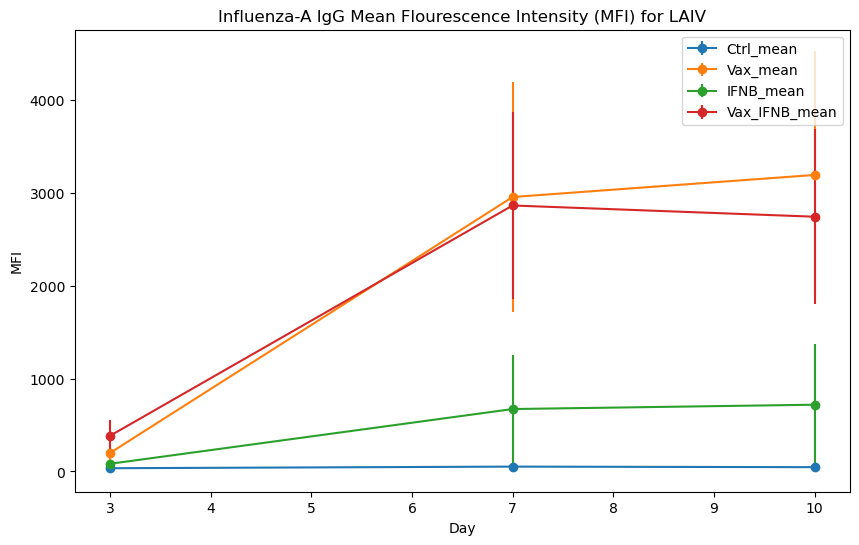

In [8]:
# Filter data for LAIV and IIV separately
laiv_data = mean_Total_data[mean_Total_data['sti_'] == 'LAIV']
iiv_data = mean_Total_data[mean_Total_data['sti_'] == 'IIV']

# Plot for LAIV
plt.figure(figsize=(10, 6))

plt.errorbar(laiv_data['day_'], laiv_data["Ctrl_mean"], yerr=laiv_data["Ctrl_sem"], label="Ctrl_mean", marker="o")
plt.errorbar(laiv_data['day_'], laiv_data["Vax_mean"],yerr=laiv_data["Vax_sem"], label="Vax_mean", marker="o")
plt.errorbar(laiv_data['day_'], laiv_data["IFNB_mean"], yerr=laiv_data["IFNB_sem"],label="IFNB_mean", marker="o")
plt.errorbar(laiv_data['day_'], laiv_data["Vax_IFNB_mean"], yerr=laiv_data["Vax_IFNB_sem"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('MFI')
plt.title('Influenza-A IgG Mean Flourescence Intensity (MFI) for LAIV')
plt.legend()
plt.show()

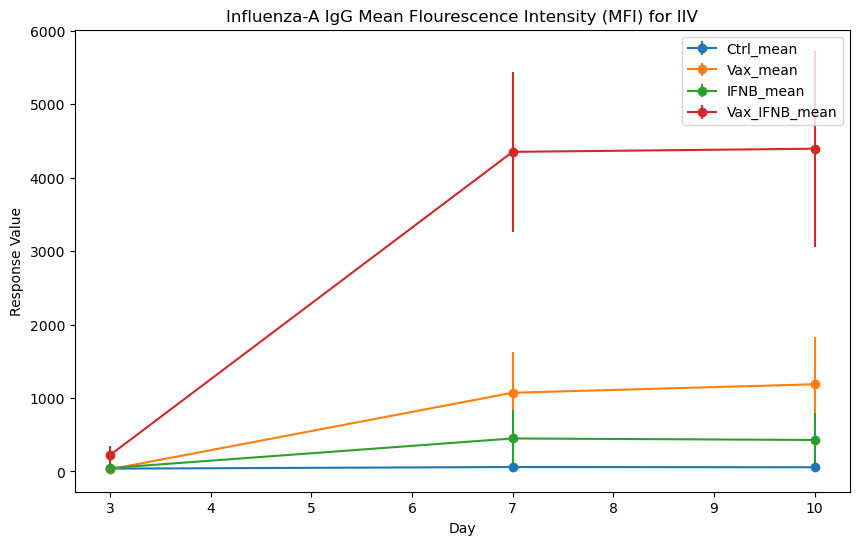

In [7]:
# Plot for IIV
plt.figure(figsize=(10, 6))

plt.errorbar(iiv_data['day_'], iiv_data["Ctrl_mean"], yerr=iiv_data["Ctrl_sem"], label="Ctrl_mean", marker="o")
plt.errorbar(iiv_data['day_'], iiv_data["Vax_mean"],yerr=iiv_data["Vax_sem"], label="Vax_mean", marker="o")
plt.errorbar(iiv_data['day_'], iiv_data["IFNB_mean"], yerr=iiv_data["IFNB_sem"],label="IFNB_mean", marker="o")
plt.errorbar(iiv_data['day_'], iiv_data["Vax_IFNB_mean"], yerr=iiv_data["Vax_IFNB_sem"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('Response Value')
plt.title('Influenza-A IgG Mean Flourescence Intensity (MFI) for IIV')
plt.legend()
plt.show()